# Sentiment Analysis

# Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

TextBlob Module: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.
For more info on how TextBlob coded up its sentiment function.

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data_rock = pd.read_pickle('data_clean_rock.pkl')
data_rock

,Lyric
0,the sun goes down and the moon comes up my hea...
1,s moy w stevenson duet with rod stewart produc...
2,babys got sunshine cause she dances through th...
3,darling yes tine its time to get next to me ho...
4,when the feeling is ended there aint no use pr...
...,...
95,her face is a map of the world is a map of the...
96,i cant believe the news today i cant close my ...
97,i was so high i did not recognize the fire bur...
98,well sometimes i go out by myself and i look a...


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_rock['polarity'] = data_rock['Lyric'].apply(pol)
data_rock['subjectivity'] = data_rock['Lyric'].apply(sub)
data_rock['Genre'] = 'Rock'
data_rock.index.name = 'SongNumber'
data_rock

,Lyric,polarity,subjectivity,Genre
SongNumber,,,,
0,the sun goes down and the moon comes up my hea...,0.142963,0.679259,Rock
1,s moy w stevenson duet with rod stewart produc...,0.346939,0.541327,Rock
2,babys got sunshine cause she dances through th...,0.195983,0.500161,Rock
3,darling yes tine its time to get next to me ho...,0.336833,0.512167,Rock
4,when the feeling is ended there aint no use pr...,0.234002,0.592647,Rock
...,...,...,...,...
95,her face is a map of the world is a map of the...,0.160784,0.524020,Rock
96,i cant believe the news today i cant close my ...,-0.328571,0.557143,Rock
97,i was so high i did not recognize the fire bur...,0.280379,0.554343,Rock


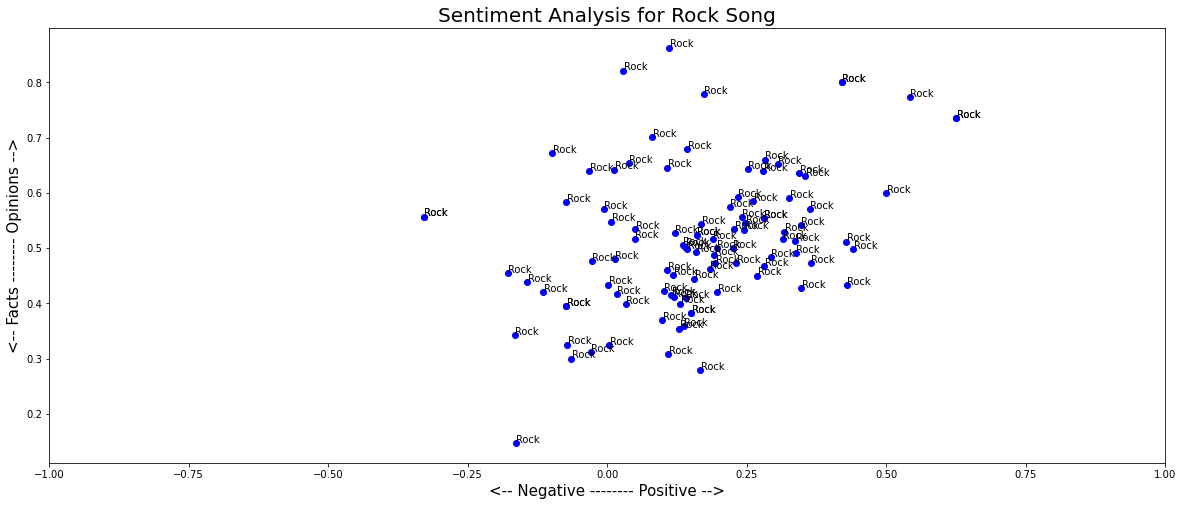

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [20, 8]

for index, song in enumerate(data_rock.index):
    x = data_rock.polarity.loc[song]
    y = data_rock.subjectivity.loc[song]
    
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_rock['Genre'][index], fontsize=10)
    plt.xlim(-1, 1) 
    
plt.title('Sentiment Analysis for Rock Song', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [4]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data_pop = pd.read_pickle('data_clean_pop.pkl')
data_pop

,Lyric
100,hey slow it down what do you want from me what...
101,died last night in my dreams walking the stree...
102,ive paid my dues time after time ive done my s...
103,so i got my boots on got the right amount of l...
104,i wish that this night would never be over the...
...,...
195,i got drive so ill survive in hollywood where ...
196,left right step up to the spotlight why you ac...
197,empty spaces what are we living for abandoned...
198,love is a burning thing and it makes a firery ...


In [5]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_pop['polarity'] = data_pop['Lyric'].apply(pol)
data_pop['subjectivity'] = data_pop['Lyric'].apply(sub)
data_pop['Genre'] = 'Pop'
data_pop.reset_index()
data_pop

,Lyric,polarity,subjectivity,Genre
100,hey slow it down what do you want from me what...,-0.036287,0.376631,Pop
101,died last night in my dreams walking the stree...,-0.007407,0.244444,Pop
102,ive paid my dues time after time ive done my s...,-0.183333,0.277778,Pop
103,so i got my boots on got the right amount of l...,0.079627,0.641636,Pop
104,i wish that this night would never be over the...,0.106584,0.440278,Pop
...,...,...,...,...
195,i got drive so ill survive in hollywood where ...,-0.156057,0.596282,Pop
196,left right step up to the spotlight why you ac...,0.023380,0.573609,Pop
197,empty spaces what are we living for abandoned...,-0.110088,0.479386,Pop
198,love is a burning thing and it makes a firery ...,0.085897,0.414103,Pop


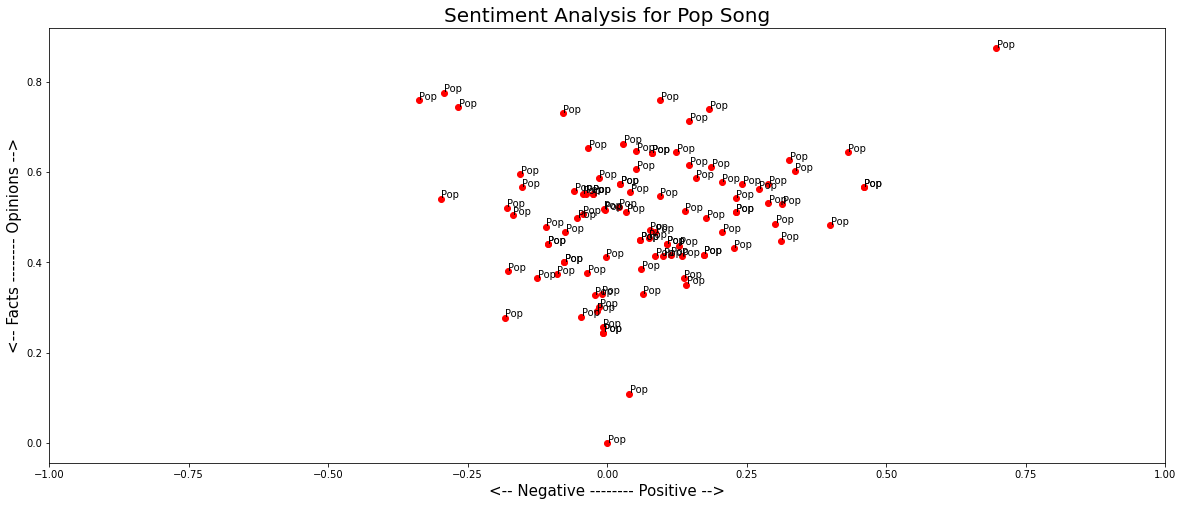

In [6]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 8]

for index, song in enumerate(data_pop.index):
    x = data_pop.polarity.loc[song]
    y = data_pop.subjectivity.loc[song]
    
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, 'Pop', fontsize=10)
    plt.xlim(-1, 1) 
    
plt.title('Sentiment Analysis for Pop Song', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [7]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data_hip = pd.read_pickle('data_clean_hiphop.pkl')
data_hip

,Lyric
200,i cant stand it i know you planned it im a set...
201,intergalactic planetary planetary intergalacti...
202,kick it verse you wake up late for school man...
203,you cant you wont and you dont stop mike d com...
204,chorus no sleep til brooklyn foot on the ped...
...,...
295,hold up goddamnit this thing alright wait hold...
296,lighten up shine like the sunlghenuphnelkeheun
297,well back to the beat yall down with the sound...
298,i know where you got to be going but you dont ...


In [8]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_hip['polarity'] = data_hip['Lyric'].apply(pol)
data_hip['subjectivity'] = data_hip['Lyric'].apply(sub)
data_hip['Genre'] = 'Hip'
data_hip.index.name = 'SongNumber'
data_hip

,Lyric,polarity,subjectivity,Genre
SongNumber,,,,
200,i cant stand it i know you planned it im a set...,0.046605,0.546914,Hip
201,intergalactic planetary planetary intergalacti...,0.046737,0.476950,Hip
202,kick it verse you wake up late for school man...,0.184286,0.551369,Hip
203,you cant you wont and you dont stop mike d com...,0.095561,0.522244,Hip
204,chorus no sleep til brooklyn foot on the ped...,0.152715,0.562500,Hip
...,...,...,...,...
295,hold up goddamnit this thing alright wait hold...,-0.185101,0.509776,Hip
296,lighten up shine like the sunlghenuphnelkeheun,0.000000,0.000000,Hip
297,well back to the beat yall down with the sound...,0.123492,0.485714,Hip


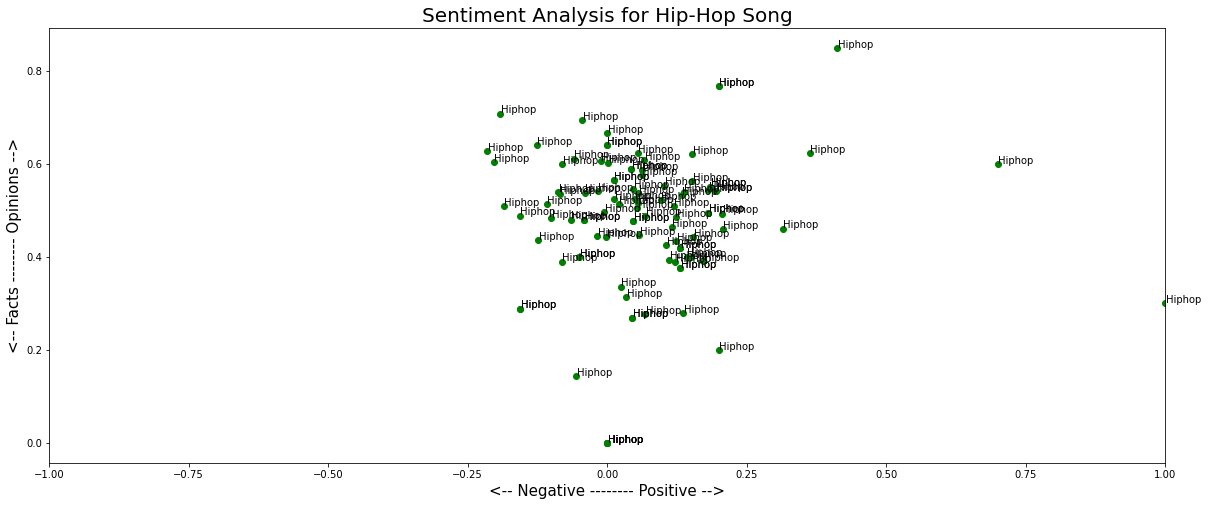

In [9]:
# Let's plot the results
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [20, 8]

for index, song in enumerate(data_hip.index):
    x = data_hip.polarity.loc[song]
    y = data_hip.subjectivity.loc[song]
    
    plt.scatter(x, y, color='Green')
    plt.text(x+.001, y+.001, 'Hiphop', fontsize=10)
    plt.xlim(-1, 1) 
    
plt.title('Sentiment Analysis for Hip-Hop Song', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

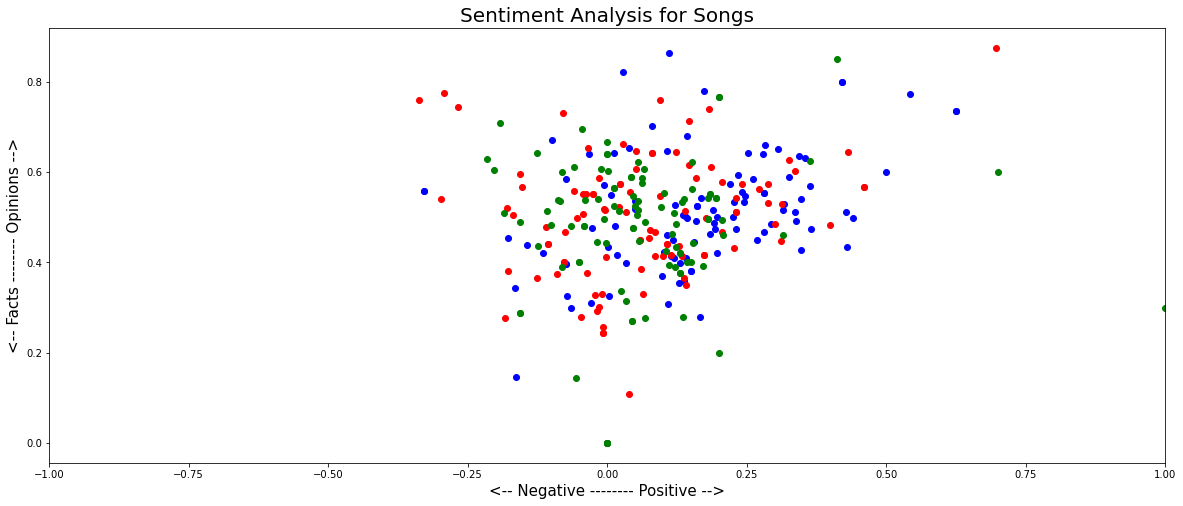

In [10]:
# Let's plot the results
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [20, 8]

for index, song in enumerate(data_rock.index):
    x = data_rock.polarity.loc[song]
    y = data_rock.subjectivity.loc[song]
    
    plt.scatter(x, y, color='blue')
    plt.xlim(-1, 1) 

for index, song in enumerate(data_pop.index):
    x = data_pop.polarity.loc[song]
    y = data_pop.subjectivity.loc[song]
    
    plt.scatter(x, y, color='red')
    plt.xlim(-1, 1)

for index, song in enumerate(data_hip.index):
    x = data_hip.polarity.loc[song]
    y = data_hip.subjectivity.loc[song]
    
    plt.scatter(x, y, color='Green')
    plt.xlim(-1, 1) 

 
   
plt.title('Sentiment Analysis for Songs', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()